<a href="https://colab.research.google.com/github/ishtiaque7/Artificial_Intelligence_AILab/blob/main/AI_Lab_ClassifierHW_212_15_4217.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score

In [81]:
df = pd.read_csv('/content/credit card (3).csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,NaN,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,NaN,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43.0,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37.0,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41.0,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         29998 non-null  float64
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [83]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           2
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [84]:
age_mean=df['AGE'].mean()

In [85]:
df = df.fillna(age_mean)
df


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.000000,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.000000,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,35.485499,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,35.485499,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.000000,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.000000,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43.000000,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37.000000,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41.000000,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [86]:
x = df.drop(['default.payment.next.month'], axis = 1)
y = df['default.payment.next.month']

In [87]:
x

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24.000000,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26.000000,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,35.485499,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,35.485499,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57.000000,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.000000,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,150000.0,1,3,2,43.000000,-1,-1,-1,-1,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000.0,1,2,2,37.000000,4,3,2,-1,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,80000.0,1,3,1,41.000000,1,-1,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [88]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

In [89]:
df_scl = pd.DataFrame(x)

In [90]:
scl = StandardScaler()

In [91]:
x = scl.fit_transform(x)

In [92]:
x

array([[-1.73199307, -1.13672015,  0.81016074, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-1.7318776 , -0.3659805 ,  0.81016074, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-1.73176213, -0.59720239,  0.81016074, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [ 1.73176213, -1.05964618, -1.23432296, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [ 1.7318776 , -0.67427636, -1.23432296, ..., -0.18512036,
         3.15253642, -0.19190359],
       [ 1.73199307, -0.90549825, -1.23432296, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [93]:
df_scl

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24.000000,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26.000000,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,35.485499,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,35.485499,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57.000000,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.000000,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,150000.0,1,3,2,43.000000,-1,-1,-1,-1,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000.0,1,2,2,37.000000,4,3,2,-1,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,80000.0,1,3,1,41.000000,1,-1,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [94]:
features = df_scl.columns

In [95]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25,random_state = 10)

RandomForestClassifier

In [96]:
RFC = RandomForestClassifier()

In [97]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [98]:
RFC_pre = RFC.predict(x_test)

In [99]:
RFC_acc = accuracy_score(RFC_pre,y_test)
RFC_acc

0.8198666666666666

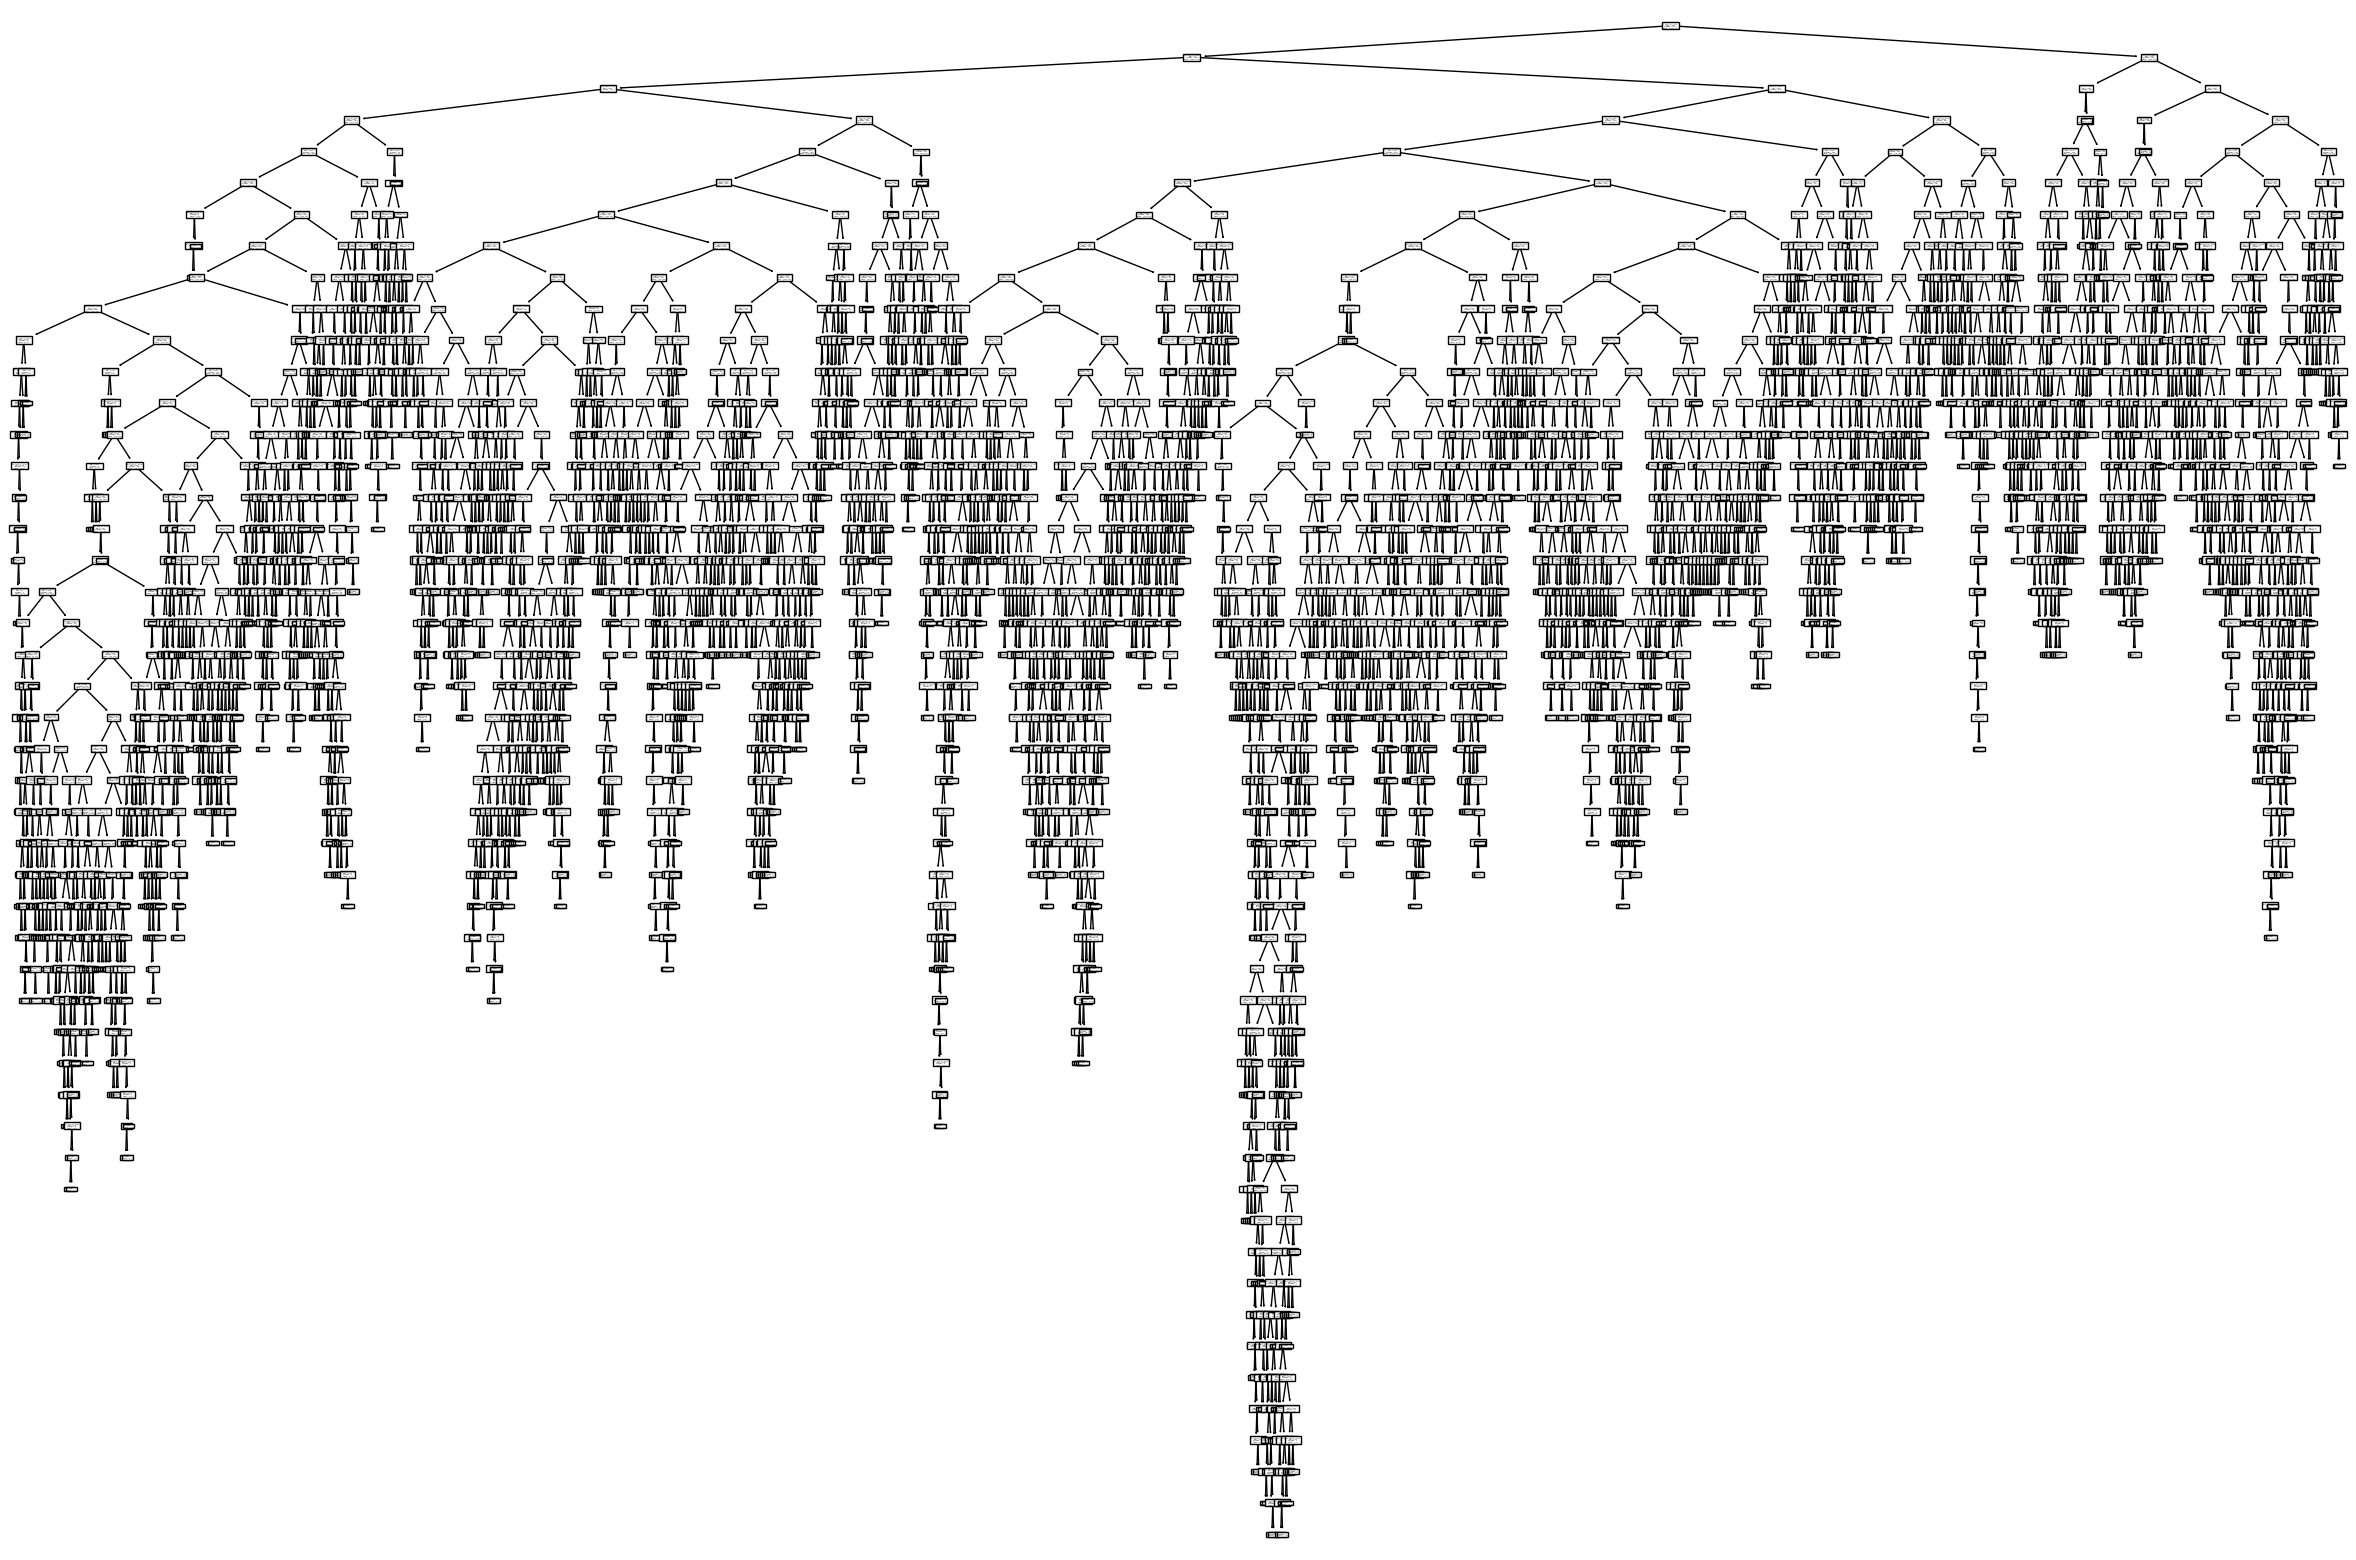

In [100]:
rf = RandomForestClassifier(n_estimators = 5)
rf.fit(x_train,y_train)
plt.figure(figsize = (30,20))
plot_tree(rf.estimators_[0], feature_names = features)
plt.show()

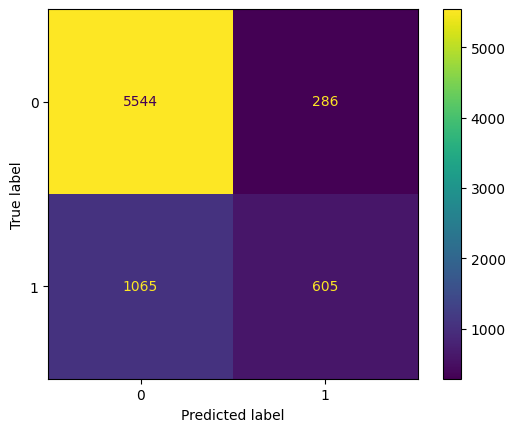

In [101]:
cm = confusion_matrix(y_test,RFC_pre)
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_disp.plot()
plt.show()

In [102]:
print(classification_report(y_test,RFC_pre))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5830
           1       0.68      0.36      0.47      1670

    accuracy                           0.82      7500
   macro avg       0.76      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500



DecisionTreeClassifier

In [103]:
DTC = tree.DecisionTreeClassifier()

In [104]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [105]:
DTC_pre = DTC.predict(x_test)

In [106]:
DTC_acc = accuracy_score(DTC_pre,y_test)
DTC_acc

0.7212

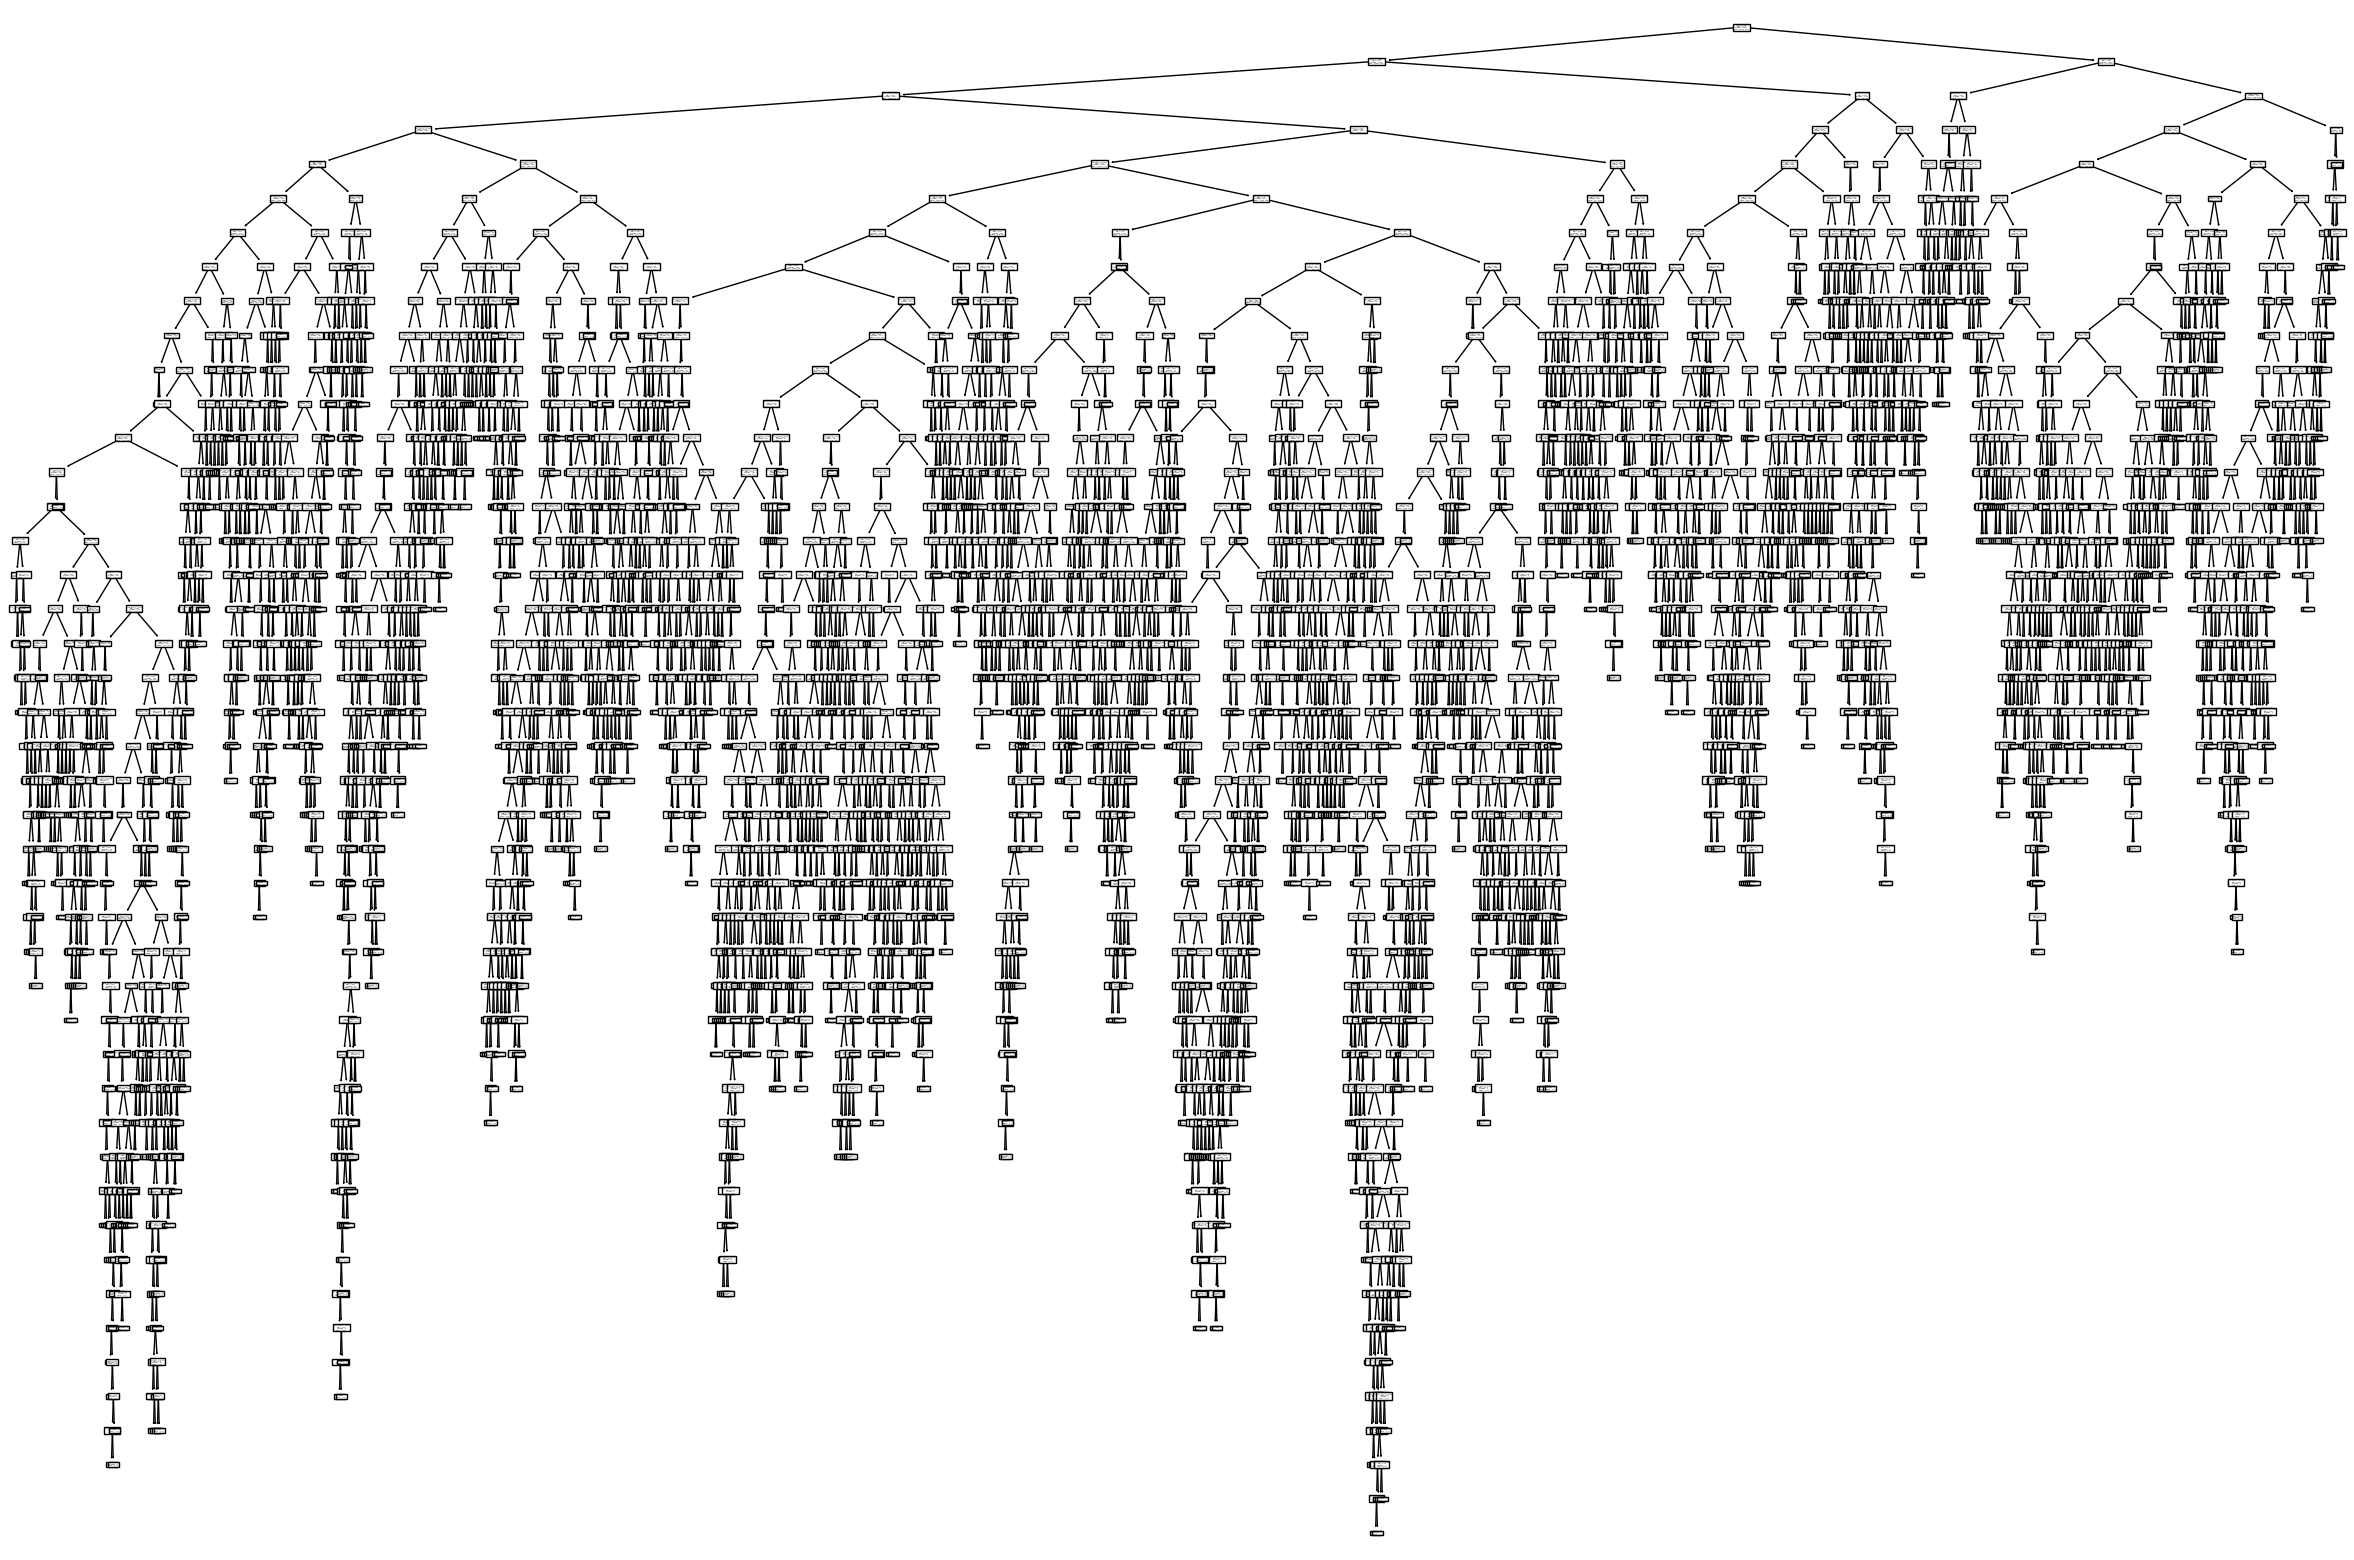

In [107]:
plt.figure(figsize = (30,20))
plot_tree(DTC,feature_names = features)
plt.show()

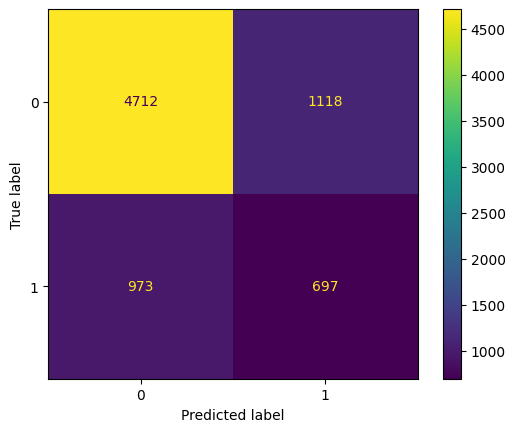

In [108]:
cm1 = confusion_matrix(y_test,DTC_pre)
cm1_disp = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_disp.plot()
plt.show()

In [109]:
print(classification_report(y_test,DTC_pre))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      5830
           1       0.38      0.42      0.40      1670

    accuracy                           0.72      7500
   macro avg       0.61      0.61      0.61      7500
weighted avg       0.73      0.72      0.73      7500



KNN

In [110]:
knn = KNeighborsClassifier()

In [111]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [112]:
knn_pre = knn.predict(x_train)

In [113]:
knn_pre = knn.predict(x_test)

In [114]:
knn_acc = accuracy_score(knn_pre,y_test)
knn_acc

0.7909333333333334

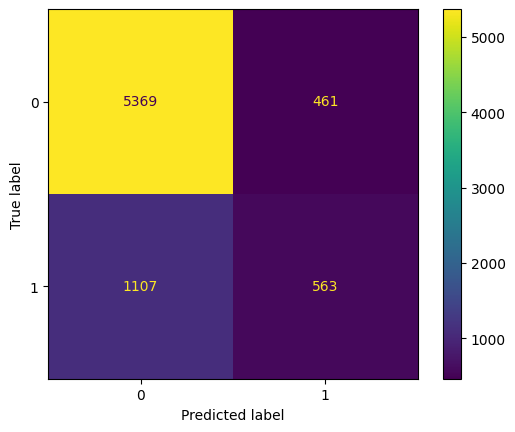

In [115]:
cm2 = confusion_matrix(y_test,knn_pre)
cm2_disp = ConfusionMatrixDisplay(confusion_matrix = cm2)
cm2_disp.plot()
plt.show()

In [116]:
print(classification_report(y_test,knn_pre))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      5830
           1       0.55      0.34      0.42      1670

    accuracy                           0.79      7500
   macro avg       0.69      0.63      0.65      7500
weighted avg       0.77      0.79      0.77      7500



LogisticRegression

In [117]:
lr = LogisticRegression()

In [118]:
lr.fit(x_train,y_train)

LogisticRegression()

In [119]:
lr_pre = lr.predict(x_train)

In [120]:
lr_pre = lr.predict(x_test)

In [121]:
lr_acc = accuracy_score(lr_pre,y_test)
lr_acc

0.8084

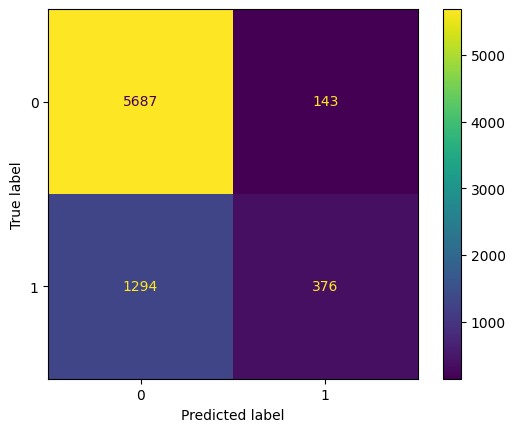

In [122]:
cm4 = confusion_matrix(y_test,lr_pre)
cm_disp4 = ConfusionMatrixDisplay(confusion_matrix = cm4)
cm_disp4.plot()
plt.show()

In [123]:
print(classification_report(y_test,lr_pre))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      5830
           1       0.72      0.23      0.34      1670

    accuracy                           0.81      7500
   macro avg       0.77      0.60      0.62      7500
weighted avg       0.79      0.81      0.77      7500



Polynomial Regression


In [148]:
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(x_train)
X_test_trans = poly.transform(x_test)

In [149]:
lrp = LinearRegression()
lrp.fit(X_train_trans,y_train)

LinearRegression()

In [151]:
y_pred = lrp.predict(X_test_trans)

In [153]:
r2_score(y_test,y_pred)

0.08589834994967782

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


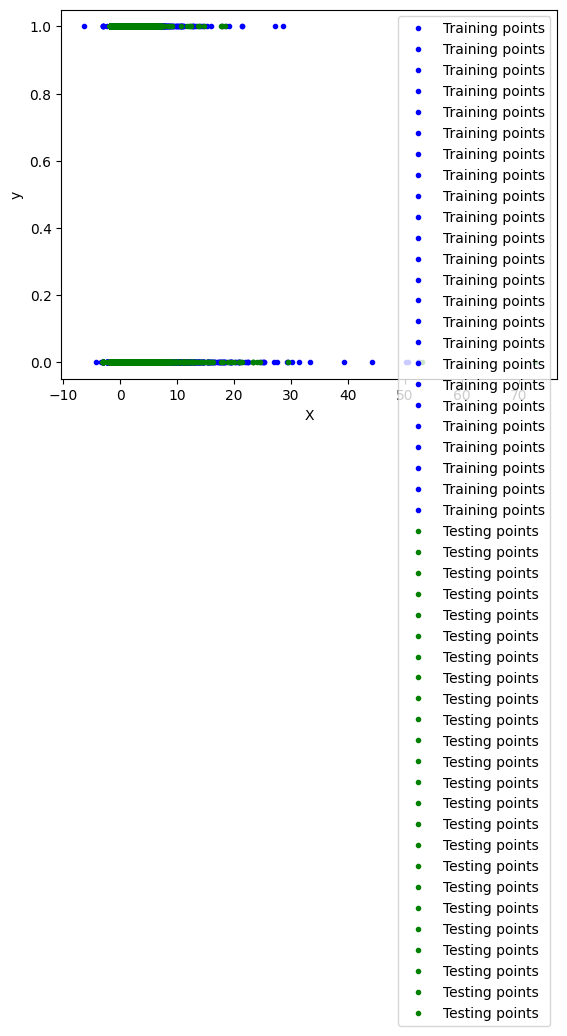

In [156]:
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


AdaBoostClassifier

In [124]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=60,
                         learning_rate=1)

In [125]:
ad_model = adaboost.fit(x_train, y_train)


In [126]:
ad_pre = ad_model.predict(x_test)

In [127]:
ad_acc = accuracy_score(ad_pre,y_test)
ad_acc

0.8172

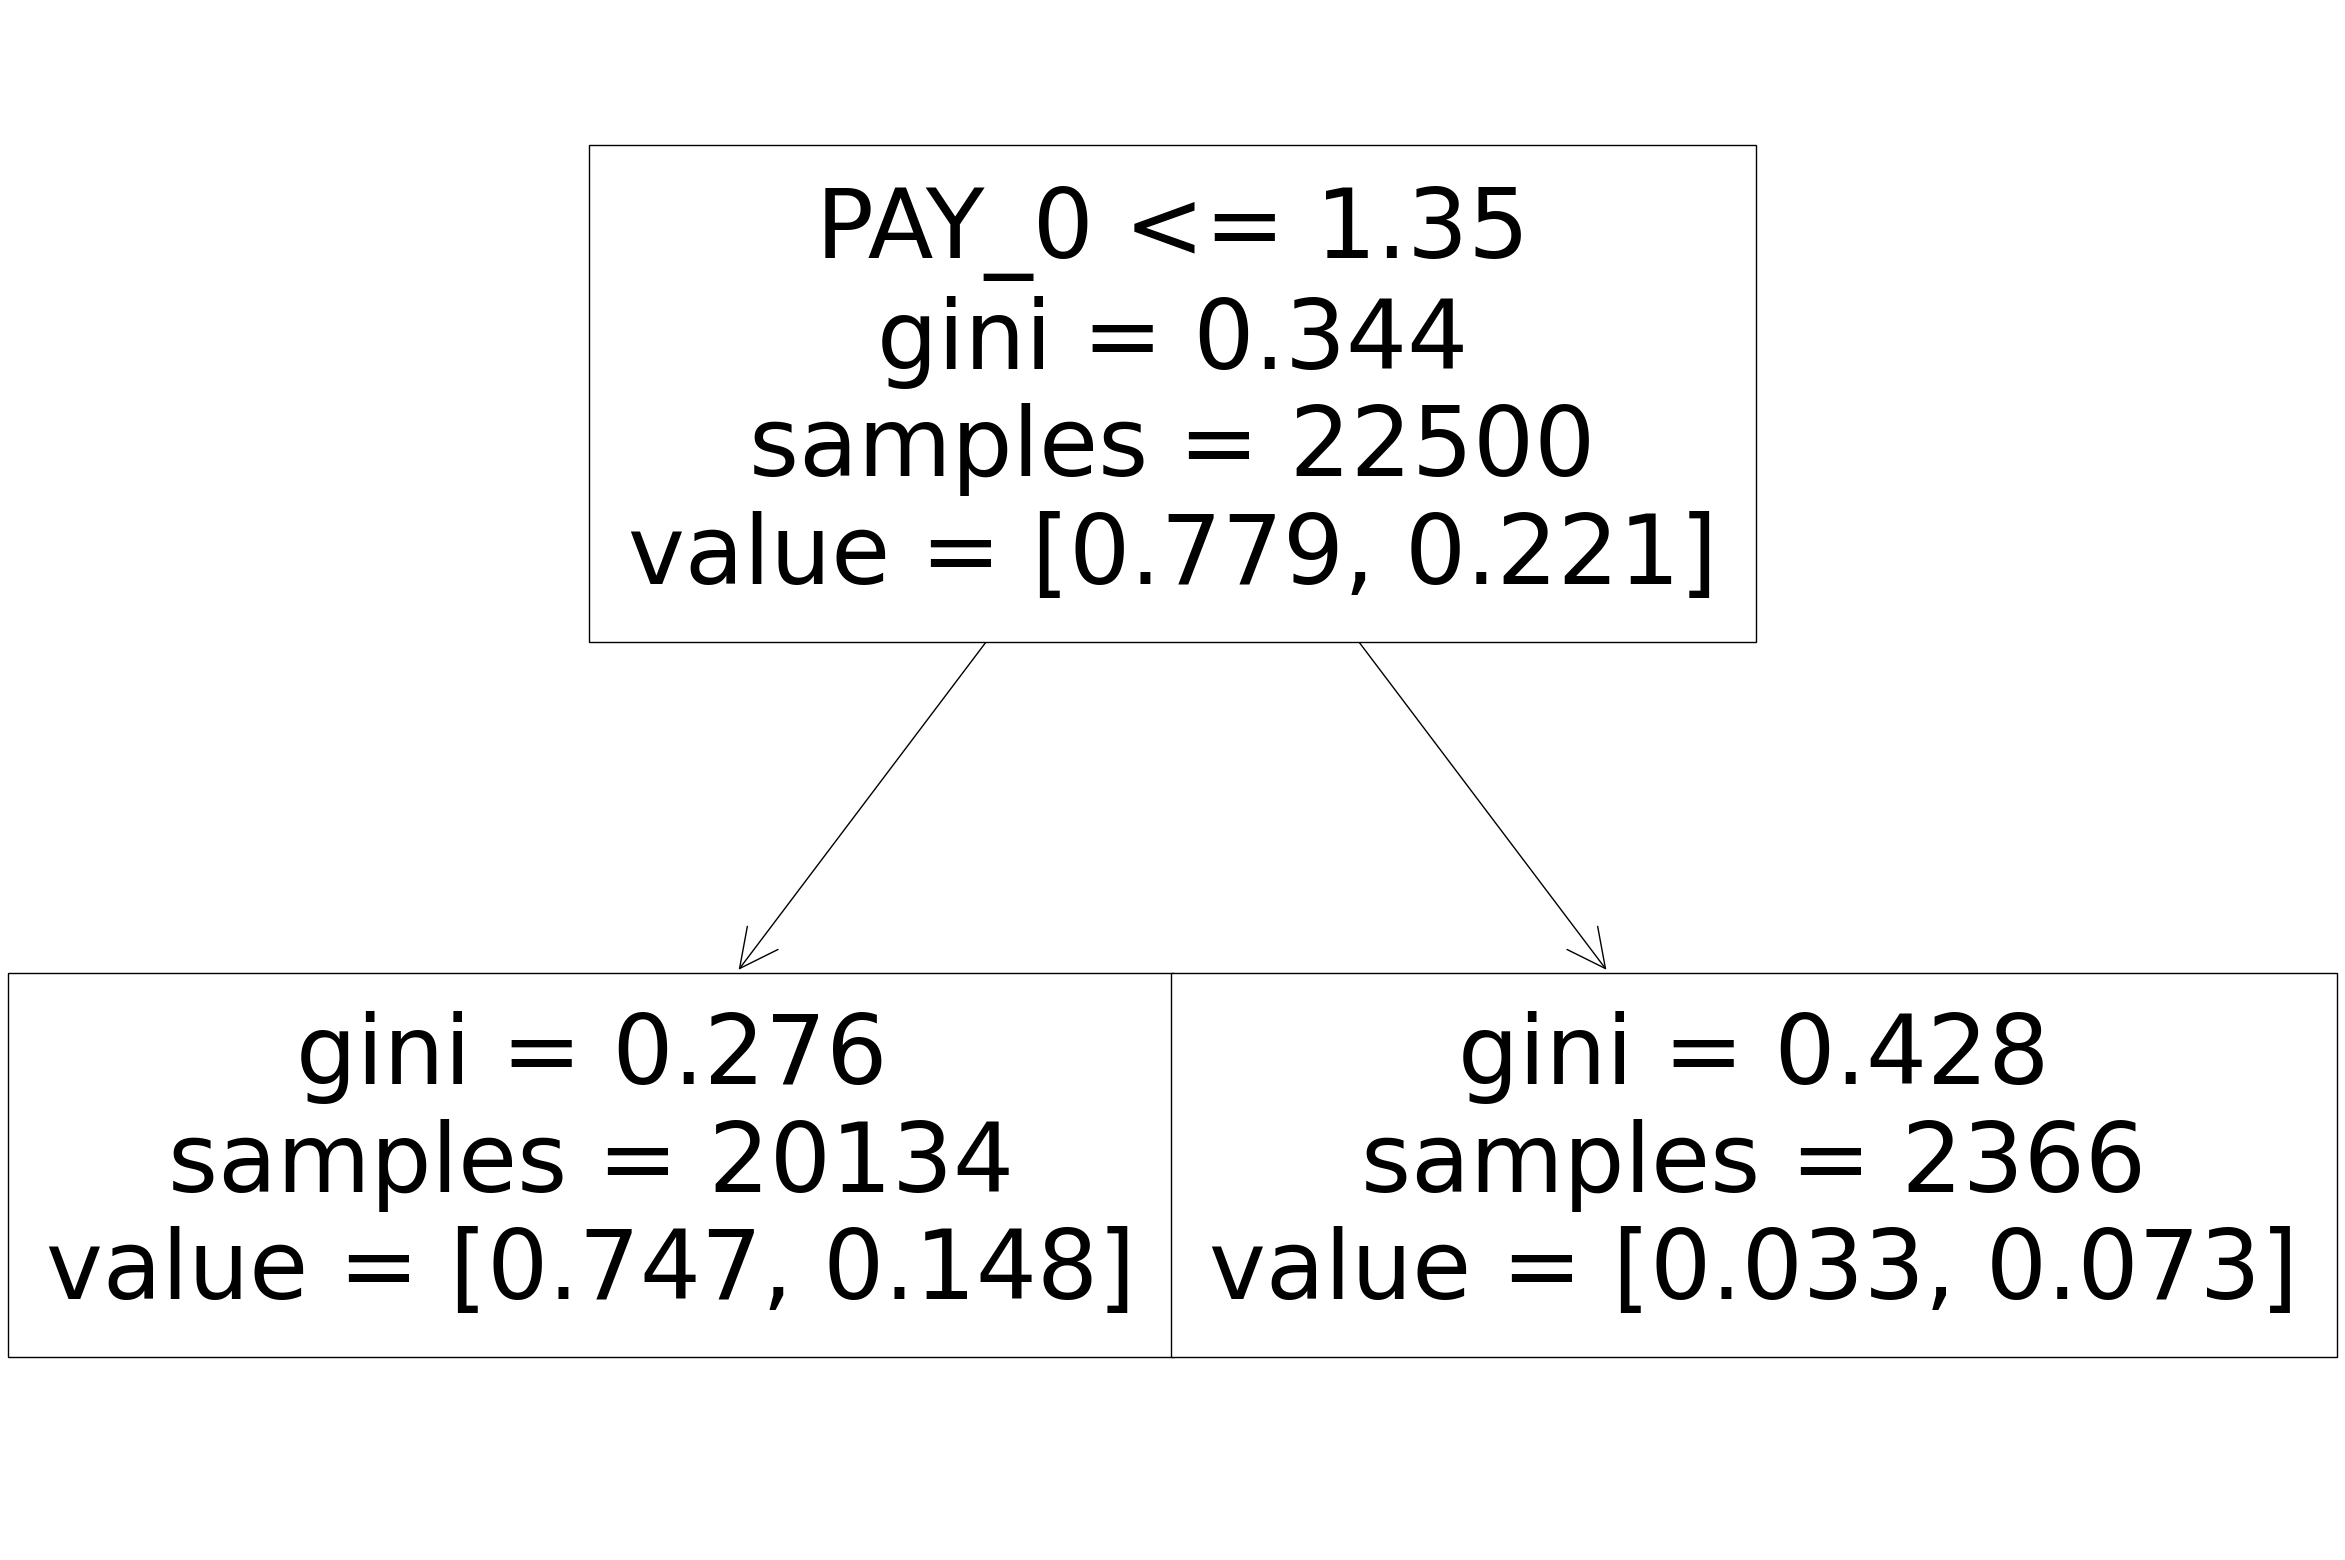

In [128]:
plt.figure(figsize = (30,20))
plot_tree(adaboost.estimators_[0], feature_names = features)
plt.show()

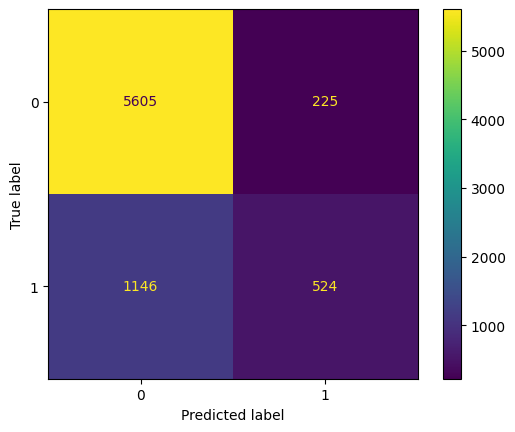

In [129]:
cm6 = confusion_matrix(y_test,ad_pre)
cm6_disp = ConfusionMatrixDisplay(confusion_matrix = cm6)
cm6_disp.plot()
plt.show()

In [130]:
print(classification_report(y_test,ad_pre))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5830
           1       0.70      0.31      0.43      1670

    accuracy                           0.82      7500
   macro avg       0.76      0.64      0.66      7500
weighted avg       0.80      0.82      0.79      7500



XGboost

In [131]:
import xgboost as xgb


In [132]:
xg = xgb.XGBClassifier()

In [133]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [134]:
xg_pre = xg.predict(x_test)

In [135]:
xg_acc = accuracy_score(xg_pre,y_test)
xg_acc*100

81.54666666666667

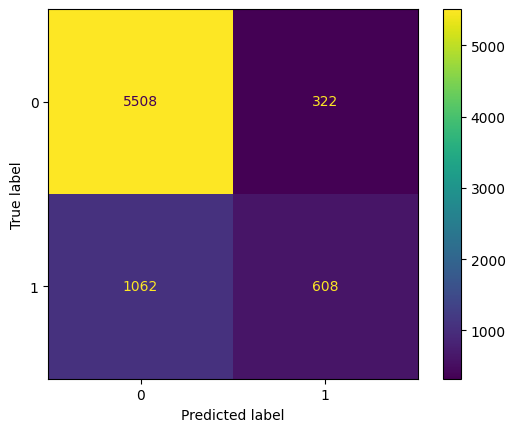

In [136]:
cm7 = confusion_matrix(y_test,xg_pre)
cm_disp7 = ConfusionMatrixDisplay(confusion_matrix = cm7)
cm_disp7.plot()
plt.show()

In [137]:
print(classification_report(y_test,xg_pre))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5830
           1       0.65      0.36      0.47      1670

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.80      0.82      0.79      7500



SVM

In [138]:
sv = SVC()

In [139]:
sv.fit(x_train,y_train)

SVC()

In [140]:
sv_pre = sv.predict(x_test)

In [141]:
sv_acc = accuracy_score(sv_pre,y_test)
sv_acc

0.8202666666666667

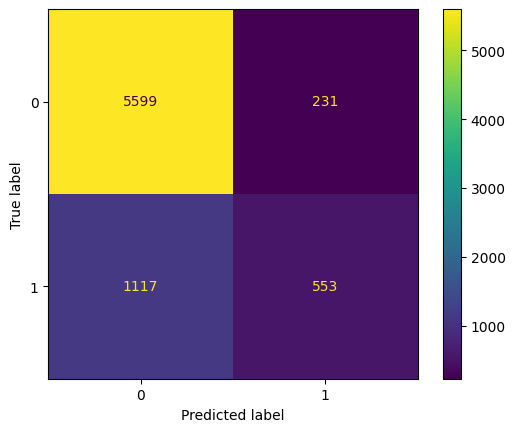

In [142]:
cm10 = confusion_matrix(y_test,sv_pre)
cm_disp10 = ConfusionMatrixDisplay(confusion_matrix = cm10)
cm_disp10.plot()
plt.show()

In [143]:
print(classification_report(y_test,sv_pre))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5830
           1       0.71      0.33      0.45      1670

    accuracy                           0.82      7500
   macro avg       0.77      0.65      0.67      7500
weighted avg       0.81      0.82      0.79      7500

